# SAA Polygon Definition Check - TKR LRS - Version 2

### Robert Cameron
### April 2021

In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

/Users/rac/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# get Simone Maldera's data files of geo coordinates where LAT rates go too high near the SAA:
# outCoords_NormRateEvtsBeforeCuts > 1.2 = cuts*.txt = rate of events downloaded from the LAT
# outCoords_NormRateEvtsBeforeFilters > 1.24 = trigs*.txt = the rate of LAT triggers

indir='/Users/rac/Documents/GLAST/ISOC/LATmetrics/saa/update-polygon/'
cuts20 = 'cuts-2020-SAA.txt'
cuts21 = 'cuts-2021-SAA.txt'
trigs20 = 'trigs-2020-SAA.txt'
trigs21 = 'trigs-2021-SAA.txt'
cuts21 = Table.read(indir+cuts21, format = 'ascii')
cuts21lat = cuts21['col2']
cuts21lon = cuts21['col3']
trigs21 = Table.read(indir+trigs21, format = 'ascii')
trigs21lat = trigs21['col2']
trigs21lon = trigs21['col3']
min(cuts21['col5']), min(trigs21['col5'])

(1.22, 1.25)

In [3]:
# set FITS file(s), for years 2008 to 2020

det = "TKR"
indir='/Users/rac/Documents/GLAST/ISOC/LATmetrics/saa/update-polygon/tkrlrs/'
infile08='timg2008.fits'
infile09='timg2009.fits'
infile10='timg2010.fits'
infile11='timg2011.fits'
infile12='timg2012.fits'
infile13='timg2013.fits'
infile14='timg2014.fits'
infile15='timg2015.fits'
infile16='timg2016.fits'
infile17='timg2017.fits'
infile18='timg2018.fits'
infile19='timg2019.fits'
infile20='timg2020.fits'

# the mask FITS image masks the SAA region, to allow only data from the SAA region to be used
mask1file = 'mask1.FITS'

In [4]:
# open and read FITS files, for years 2008 to 2020

hdu08 = fits.open(indir+infile08)
hdu09 = fits.open(indir+infile09)
hdu10 = fits.open(indir+infile10)
hdu11 = fits.open(indir+infile11)
hdu12 = fits.open(indir+infile12)
hdu13 = fits.open(indir+infile13)
hdu14 = fits.open(indir+infile14)
hdu15 = fits.open(indir+infile15)
hdu16 = fits.open(indir+infile16)
hdu17 = fits.open(indir+infile17)
hdu18 = fits.open(indir+infile18)
hdu19 = fits.open(indir+infile19)
hdu20 = fits.open(indir+infile20)
hdumask1 = fits.open(indir+mask1file)
#hdu09.info(), hdu13.info(), hdumask.info()

In [5]:
# FITS 4D cube data four axes are: 
# 1 (len = 3): (LRS12 val, LRS34 val, intTime or Count)
# 2 (len = 18): (global Avg, global Stdev, [TowerAVg x 16])
# 3 (len = 53): latitude (-26 to +26) (1-deg pixels)
# 4 (len = 361): longitude (-180 to +180) (1-deg pixels)
# LON LAT SAVG_12 SAVG_34 SAVG_TINT STDEV_12 STDEV_34 COUNT (MODAVG_12x MODAVG_34x MODAVG_TINTx) for x=0..15

image08 = hdu08[0].data
image09 = hdu09[0].data
image10 = hdu10[0].data
image11 = hdu11[0].data
image12 = hdu12[0].data
image13 = hdu13[0].data
image14 = hdu14[0].data
image15 = hdu15[0].data
image16 = hdu16[0].data
image17 = hdu17[0].data
image18 = hdu18[0].data
image19 = hdu19[0].data
image20 = hdu20[0].data
m = hdumask1[0].data
np.shape(image08), np.shape(image20), np.shape(m)

((3, 18, 53, 361), (3, 18, 53, 361), (53, 361))

In [11]:
# work with average image, averaged over all towers

im08=image08[0,0,:,:]
im09=image09[0,0,:,:]
im10=image10[0,0,:,:]
im11=image11[0,0,:,:]
im12=image12[0,0,:,:]
im13=image13[0,0,:,:]
im14=image14[0,0,:,:]
im15=image15[0,0,:,:]
im16=image16[0,0,:,:]
im17=image17[0,0,:,:]
im18=image18[0,0,:,:]
im19=image19[0,0,:,:]
im20=image20[0,0,:,:]
np.shape(im08), np.shape(im20), np.sum(im08), np.sum(im19), np.sum(im20)

((53, 361), (53, 361), 6644605.381000001, 6552504.703, 6458221.714999999)

In [12]:
# make masked images

mim08=image08[0,0,:,:]*m
mim09=image09[0,0,:,:]*m
mim10=image10[0,0,:,:]*m
mim11=image11[0,0,:,:]*m
mim12=image12[0,0,:,:]*m
mim13=image13[0,0,:,:]*m
mim14=image14[0,0,:,:]*m
mim15=image15[0,0,:,:]*m
mim16=image16[0,0,:,:]*m
mim17=image17[0,0,:,:]*m
mim18=image18[0,0,:,:]*m
mim19=image19[0,0,:,:]*m
mim20=image20[0,0,:,:]*m
np.shape(mim08), np.shape(mim20), np.sum(mim08), np.sum(mim19), np.sum(mim20)

((53, 361), (53, 361), 3317426.822, 3161776.696, 3071609.58)

In [13]:
tmim08=mim08[0:40,60:220]
tmim09=mim09[0:40,60:220]
tmim10=mim10[0:40,60:220]
tmim11=mim11[0:40,60:220]
tmim12=mim12[0:40,60:220]
tmim13=mim13[0:40,60:220]
tmim14=mim14[0:40,60:220]
tmim15=mim15[0:40,60:220]
tmim16=mim16[0:40,60:220]
tmim17=mim17[0:40,60:220]
tmim18=mim18[0:40,60:220]
tmim19=mim19[0:40,60:220]
tmim20=mim20[0:40,60:220]
np.shape(tmim08), np.shape(tmim20), np.sum(tmim08),np.sum(tmim19),np.sum(tmim20)

((40, 160), (40, 160), 3317426.8219999997, 3161776.696, 3071609.58)

In [13]:
s08=np.sum(mim08)
s09=np.sum(mim09)
s10=np.sum(mim10)
s11=np.sum(mim11)
s12=np.sum(mim12)
s13=np.sum(mim13)
s14=np.sum(mim14)
s15=np.sum(mim15)
s16=np.sum(mim16)
s17=np.sum(mim17)
s18=np.sum(mim18)
s19=np.sum(mim19)
s20=np.sum(mim20)
strend=(s08,s09,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20)
syear=(8,9,10,11,12,13,14,15,16,17,18,19,20)

Text(0, 0.5, 'Pixel Sum within SAA boundary')

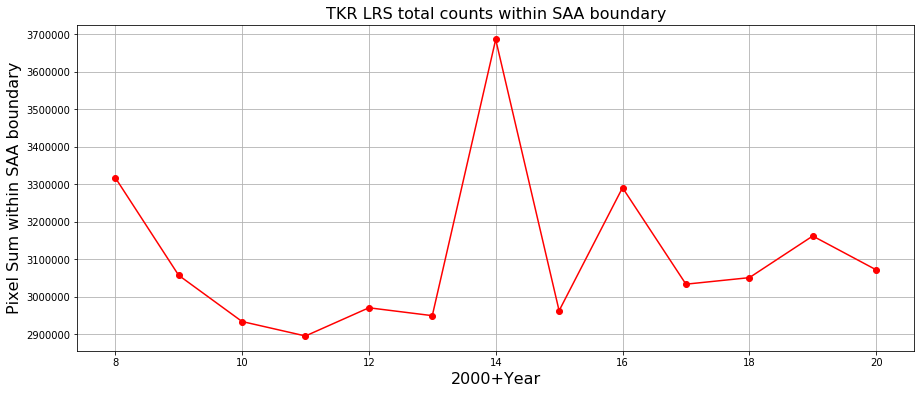

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(syear,strend,'o-',color='r')
plt.grid()
plt.title(det+' LRS total counts within SAA boundary',size=16)
plt.xlabel('2000+Year',size=16)
plt.ylabel('Pixel Sum within SAA boundary', size=16)

In [15]:
mim08[10,10],mim08[3,70],mim08[30,140],mim19[10,10],mim19[3,70],mim19[30,140],mim20[10,10],mim20[3,70],mim20[30,140]

(0.0, 0.0, 236.368, 0.0, 0.0, 218.697, 0.0, 0.0, 220.989)

In [16]:
# normalize the images by their summed counts

tim08=im08[0:40,60:220]
tim09=im09[0:40,60:220]
tim10=im10[0:40,60:220]
tim11=im11[0:40,60:220]
tim12=im12[0:40,60:220]
tim13=im13[0:40,60:220]
tim14=im14[0:40,60:220]
tim15=im15[0:40,60:220]
tim16=im16[0:40,60:220]
tim17=im17[0:40,60:220]
tim18=im18[0:40,60:220]
tim19=im19[0:40,60:220]
tim20=im20[0:40,60:220]

ntim08=tim08/(s08/2e7)
ntim09=tim09/(s09/2e7)
ntim10=tim10/(s10/2e7)
ntim11=tim11/(s11/2e7)
ntim12=tim12/(s12/2e7)
ntim13=tim13/(s13/2e7)
ntim14=tim14/(s14/2e7)
ntim15=tim15/(s15/2e7)
ntim16=tim16/(s16/2e7)
ntim17=tim17/(s17/2e7)
ntim18=tim18/(s18/2e7)
ntim19=tim19/(s19/2e7)
ntim20=tim20/(s20/2e7)

ntmim08=tmim08/(s08/2e7)
ntmim09=tmim09/(s09/2e7)
ntmim10=tmim10/(s10/2e7)
ntmim11=tmim11/(s11/2e7)
ntmim12=tmim12/(s12/2e7)
ntmim13=tmim13/(s13/2e7)
ntmim14=tmim14/(s14/2e7)
ntmim15=tmim15/(s15/2e7)
ntmim16=tmim16/(s16/2e7)
ntmim17=tmim17/(s17/2e7)
ntmim18=tmim18/(s18/2e7)
ntmim19=tmim19/(s19/2e7)
ntmim20=tmim20/(s20/2e7)

In [17]:
# Current LAT SAA polygon 
llon = np.array([ 33.9,  24.5, -18.6, -25.7, -36.0, -42.0, -58.8, -93.1, -97.5, -98.5, -92.1, -86.1,  33.9])
llat = np.array([-30.0, -22.6,   2.5,   5.2,   5.2,   4.6,   0.7,  -8.6,  -9.9, -12.5, -21.7, -30.0, -30.0])

# Current GBM SAA polygon
# 20 July 2010

gbmlon = np.array([ 33.9,  12.398, -9.103, -30.605, -38.4, -45.0, -65.0, -84.0,  -89.2,   -94.3,   -94.3,   -86.1])
gbmlat = np.array([-30.0, -19.867, -9.733,   0.4,     2.0,   2.0,  -1.0,  -6.155, -8.880, -14.220, -18.404, -30.0])

# New Possible LAT SAA polygon 
newlon = np.array([ 33.9, -30.0, -36.0, -42.0, -65.0, -84.0,  -97.5, -98.5, -86.1, -40.0, -20.0,   0.0,  33.9])
newlat = np.array([-30.0,   3.0,   4.0,   3.6,  -1.0,  -6.15,  -9.9, -12.5, -30.0, -30.0, -30.0, -30.0, -30.0])

# New Possible LAT SAA polygon - interim
newlonint = np.array([ 33.9, -27.7, -36.0, -42.0, -58.8, -84.0,  -97.5, -98.5, -86.1, -40.0, -20.0,   0.0,  33.9])
newlatint = np.array([-30.0,   4.3,   4.6,   4.1,   0.7,  -6.15,  -9.9, -12.5, -30.0, -30.0, -30.0, -30.0, -30.0])

# Alternative New Possible LAT SAA polygon 
altnewlon = np.array([ 33.9, -30.0, -36.0, -42.0, -58.8, -97.5, -98.5, -86.1, -60.0, -40.0, -20.0,   0.0,  33.9])
altnewlat = np.array([-30.0,   3.0,   4.6,   4.6,   0.7,  -9.9, -12.5, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0])

# Alternative New Possible LAT SAA polygon - interim
altnewlonint = np.array([ 33.9, -27.7, -36.0, -42.0, -58.8, -97.5, -98.5, -86.1, -60.0, -40.0, -20.0,   0.0,  33.9])
altnewlatint = np.array([-30.0,   4.3,   4.9,   4.6,   0.7,  -9.9, -12.5, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0])

# Alternative2 New Possible LAT SAA polygon 
alt2newlon = np.array([ 33.9, -30.0, -42.0, -58.8, -97.5, -98.5, -86.1, -60.0, -40.0, -20.0,   0.0,  20.0,  33.9])
alt2newlat = np.array([-30.0,   3.0,   4.6,   0.7,  -9.9, -12.5, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0])

# Alternative2 New Possible LAT SAA polygon - interim
alt2newlonint = np.array([ 33.9, -27.7, -42.0, -58.8, -97.5, -98.5, -86.1, -60.0, -40.0, -20.0,   0.0,  20.0,  33.9])
alt2newlatint = np.array([-30.0,   4.3,   4.6,   0.7,  -9.9, -12.5, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0])

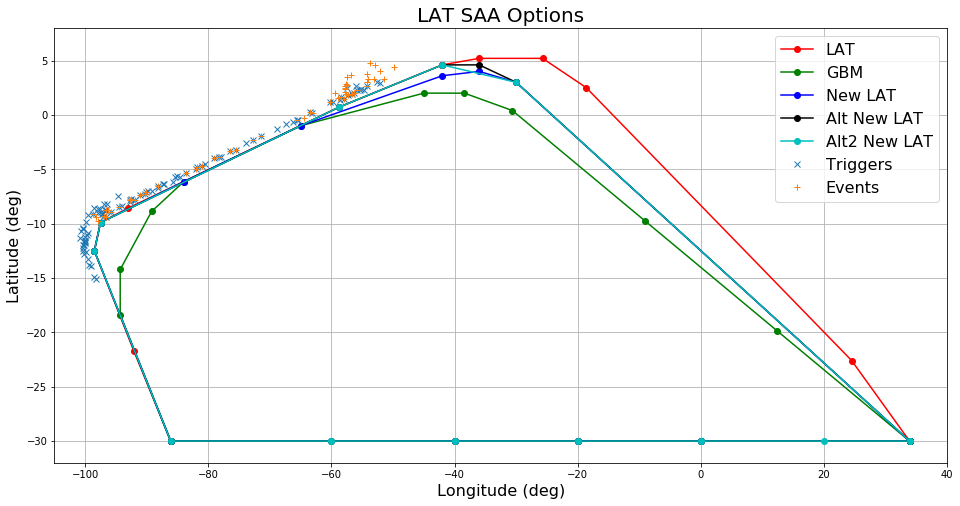

In [52]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(llon,llat,"o-",color='r',label='LAT')
ax.plot(gbmlon,gbmlat,"o-",color='g',label='GBM')
ax.plot(newlon,newlat,"o-",color='b',label='New LAT')
ax.plot(altnewlon,altnewlat,"o-",color='k',label='Alt New LAT')
ax.plot(alt2newlon,alt2newlat,"o-",color='c',label='Alt2 New LAT')
ax.plot(trigs21lon,trigs21lat,'x',label='Triggers')
ax.plot(cuts21lon,cuts21lat,'+',label='Events')
plt.xlim([-105,40])
plt.ylim([-32,8])
plt.title('LAT SAA Options', size=20)
plt.xlabel('Longitude (deg)',size=16)
plt.ylabel('Latitude (deg)',size=16)
plt.legend(fontsize=16)
ax.grid()

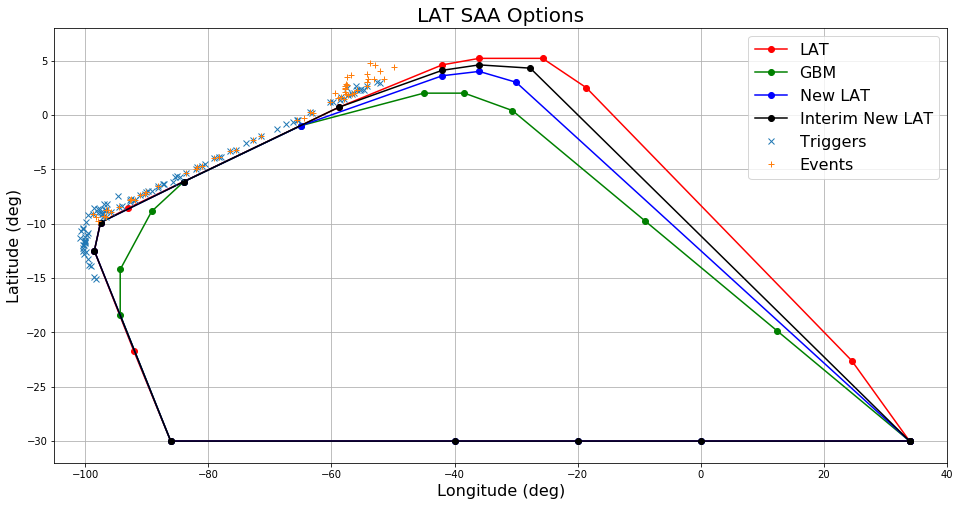

In [53]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(llon,llat,"o-",color='r',label='LAT')
ax.plot(gbmlon,gbmlat,"o-",color='g',label='GBM')
ax.plot(newlon,newlat,"o-",color='b',label='New LAT')
ax.plot(newlonint,newlatint,"o-",color='k',label='Interim New LAT')
ax.plot(trigs21lon,trigs21lat,'x',label='Triggers')
ax.plot(cuts21lon,cuts21lat,'+',label='Events')
plt.xlim([-105,40])
plt.ylim([-32,8])
plt.title('LAT SAA Options', size=20)
plt.xlabel('Longitude (deg)',size=16)
plt.ylabel('Latitude (deg)',size=16)
plt.legend(fontsize=16)
ax.grid()

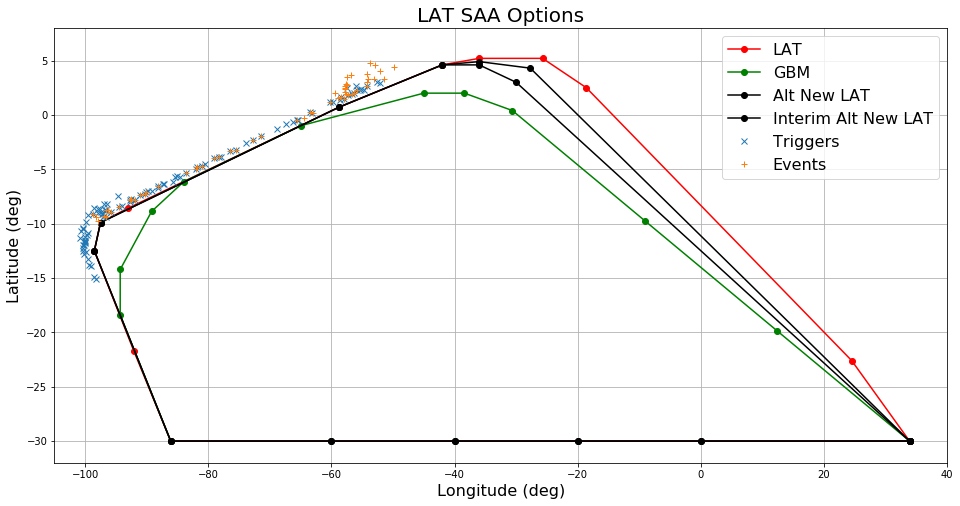

In [29]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(llon,llat,"o-",color='r',label='LAT')
ax.plot(gbmlon,gbmlat,"o-",color='g',label='GBM')
ax.plot(altnewlon,altnewlat,"o-",color='k',label='Alt New LAT')
ax.plot(altnewlonint,altnewlatint,"o-",color='k',label='Interim Alt New LAT')
ax.plot(trigs21lon,trigs21lat,'x',label='Triggers')
ax.plot(cuts21lon,cuts21lat,'+',label='Events')
plt.xlim([-105,40])
plt.ylim([-32,8])
plt.title('LAT SAA Options', size=20)
plt.xlabel('Longitude (deg)',size=16)
plt.ylabel('Latitude (deg)',size=16)
plt.legend(fontsize=16)
ax.grid()

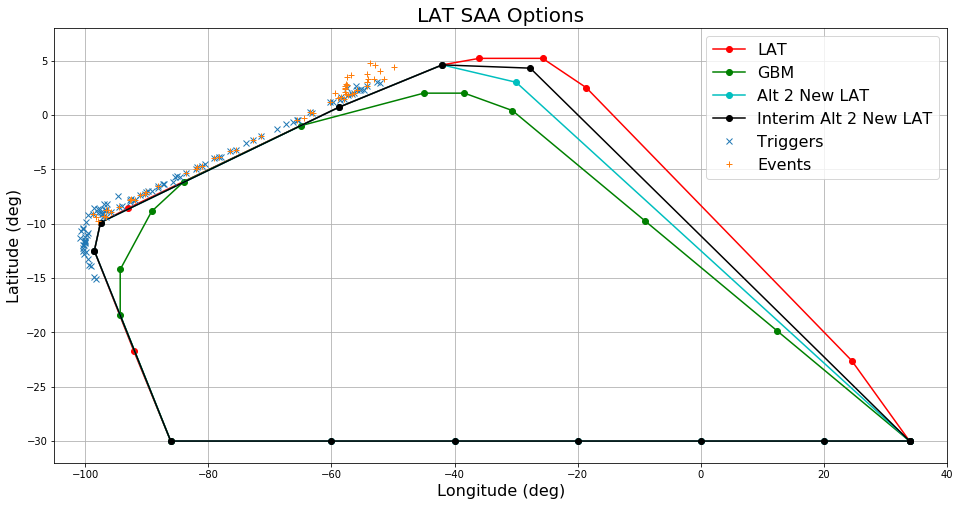

In [30]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(llon,llat,"o-",color='r',label='LAT')
ax.plot(gbmlon,gbmlat,"o-",color='g',label='GBM')
ax.plot(alt2newlon,alt2newlat,"o-",color='c',label='Alt 2 New LAT')
ax.plot(alt2newlonint,alt2newlatint,"o-",color='k',label='Interim Alt 2 New LAT')
ax.plot(trigs21lon,trigs21lat,'x',label='Triggers')
ax.plot(cuts21lon,cuts21lat,'+',label='Events')
plt.xlim([-105,40])
plt.ylim([-32,8])
plt.title('LAT SAA Options', size=20)
plt.xlabel('Longitude (deg)',size=16)
plt.ylabel('Latitude (deg)',size=16)
plt.legend(fontsize=16)
ax.grid()

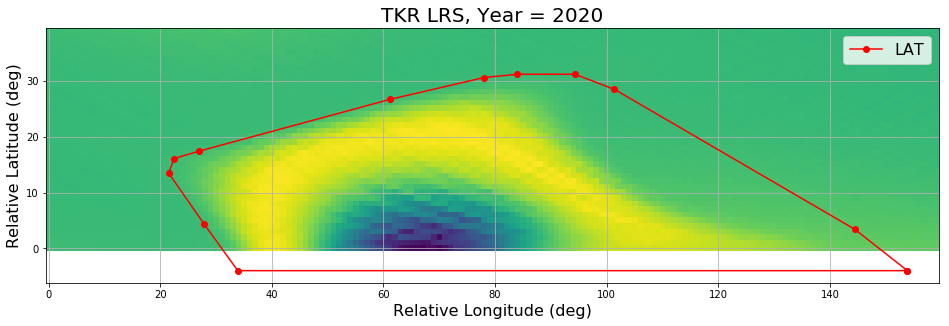

In [31]:
fig, ax = plt.subplots(figsize=(16, 8))
#ax.imshow(np.sqrt(im2),origin='lower')
#ax.imshow(np.log(im2),origin='lower')
ax.imshow(np.log(ntim20),origin='lower')
ax.plot(llon+120,llat+26,"o-",color='r',label='LAT')
#ax.plot(gbmlon+120,gbmlat+26,"o-",color='w',label='GBM')
#ax.plot(newlon+120,newlat+26,"o-",color='b',label='New LAT')
plt.title(det+' LRS, Year = 2020', size=20)
plt.xlabel('Relative Longitude (deg)',size=16)
plt.ylabel('Relative Latitude (deg)',size=16)
plt.legend(fontsize=16)
ax.grid()

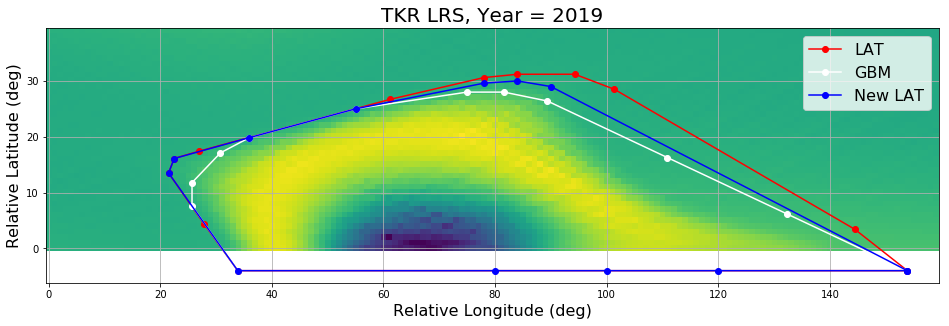

In [32]:
fig, ax = plt.subplots(figsize=(16, 8))
#ax.imshow(np.sqrt(im2),origin='lower')
#ax.imshow(np.log(im2),origin='lower')
ax.imshow(np.log(ntim19),origin='lower')
ax.plot(llon+120,llat+26,"o-",color='r',label='LAT')
ax.plot(gbmlon+120,gbmlat+26,"o-",color='w',label='GBM')
ax.plot(newlon+120,newlat+26,"o-",color='b',label='New LAT')
plt.title(det+' LRS, Year = 2019', size=20)
plt.xlabel('Relative Longitude (deg)',size=16)
plt.ylabel('Relative Latitude (deg)',size=16)
plt.legend(fontsize=16)
ax.grid()

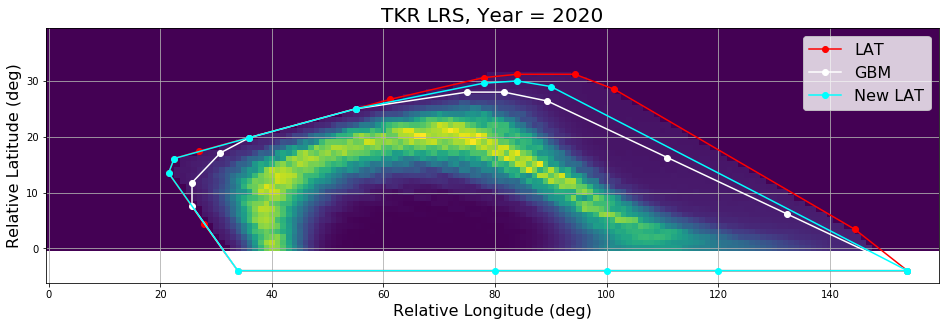

In [33]:
fig, ax = plt.subplots(figsize=(16, 8))
#ax.imshow(np.sqrt(im2),origin='lower')
#ax.imshow(np.log(im2),origin='lower')
ax.imshow(tmim20,origin='lower')
ax.plot(llon+120,llat+26,"o-",color='r',label='LAT')
ax.plot(gbmlon+120,gbmlat+26,"o-",color='w',label='GBM')
ax.plot(newlon+120,newlat+26,"o-",color='cyan',label='New LAT')
plt.title(det+' LRS, Year = 2020', size=20)
plt.xlabel('Relative Longitude (deg)',size=16)
plt.ylabel('Relative Latitude (deg)',size=16)
plt.legend(fontsize=16)
ax.grid()

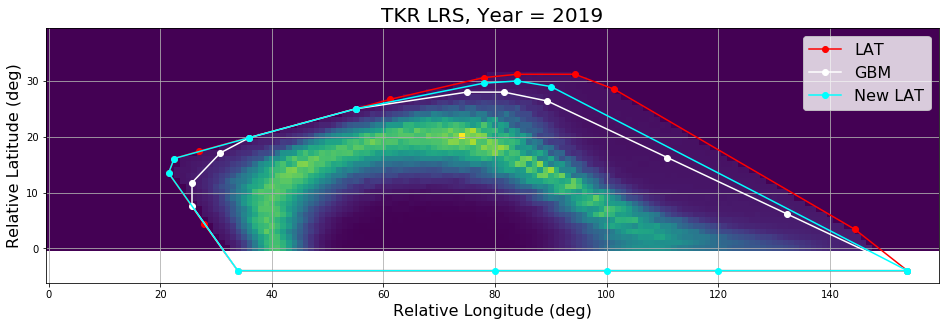

In [34]:
fig, ax = plt.subplots(figsize=(16, 8))
#ax.imshow(np.sqrt(im2),origin='lower')
#ax.imshow(np.log(im2),origin='lower')
ax.imshow(tmim19,origin='lower')
ax.plot(llon+120,llat+26,"o-",color='r',label='LAT')
ax.plot(gbmlon+120,gbmlat+26,"o-",color='w',label='GBM')
ax.plot(newlon+120,newlat+26,"o-",color='cyan',label='New LAT')
plt.title(det+' LRS, Year = 2019', size=20)
plt.xlabel('Relative Longitude (deg)',size=16)
plt.ylabel('Relative Latitude (deg)',size=16)
plt.legend(fontsize=16)
ax.grid()

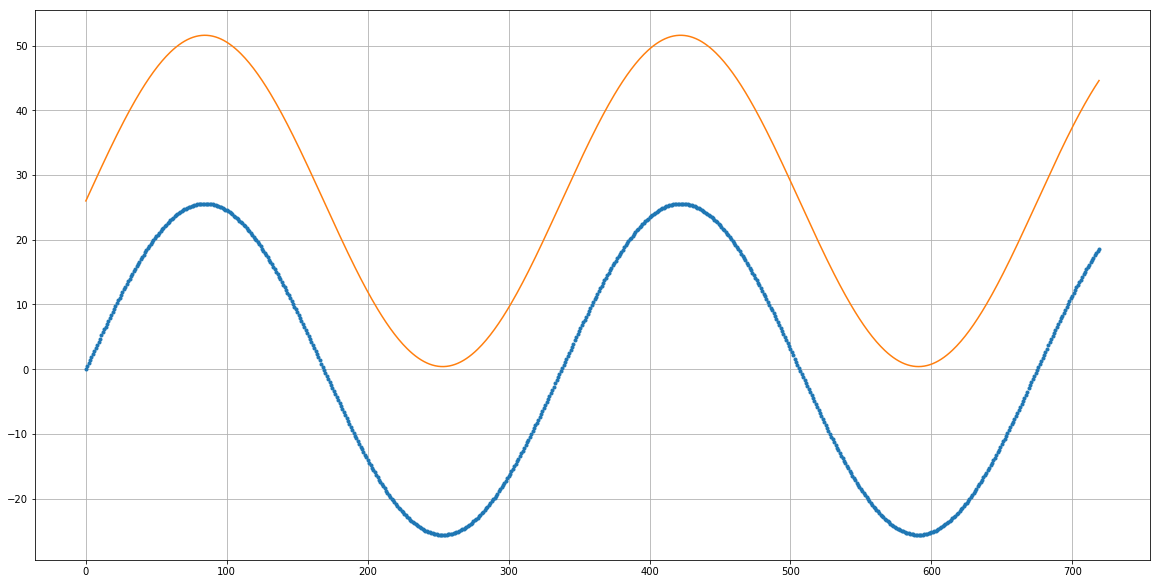

In [35]:
phase = 140
orb_deg = 360/(360+360/15.1)
orbx = np.arange(720)
orby = 25.6*np.sin(orbx*np.pi/180/orb_deg)
orby26 = orby+26
#sorbx = np.roll(orbx,phase)
fig, ax = plt.subplots(figsize=(16, 8), constrained_layout=True)
ax.plot(orby[0:],'.')
ax.plot(orby26)
plt.grid()

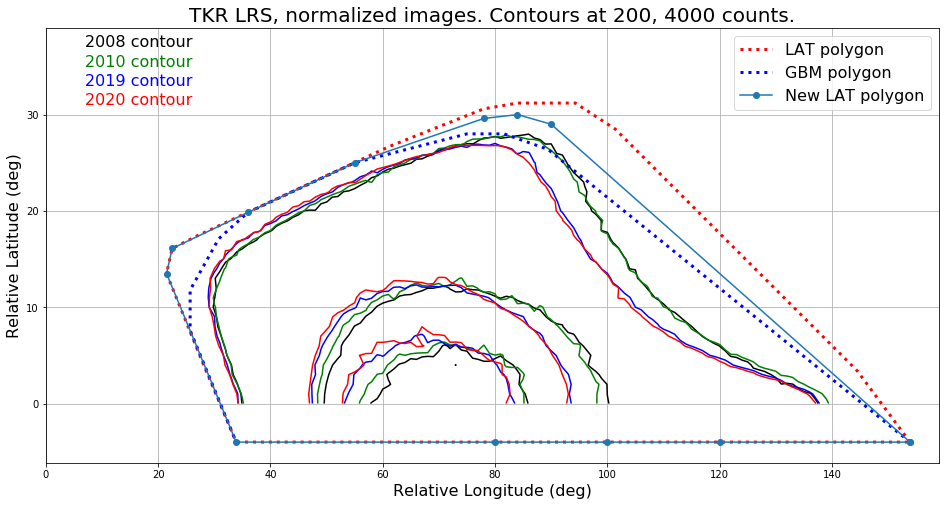

In [36]:
fig, ax = plt.subplots(figsize=(16, 8))
levs = [200,4000]
ax.contour(ntim08,levels=levs,colors='k')
ax.contour(ntim10,levels=levs,colors='g')
ax.contour(ntim19,levels=levs,colors='b')
ax.contour(ntim20,levels=levs,colors='r')
ax.grid()
ax.plot(llon+120,llat+26,':',color='r',linewidth=3,label='LAT polygon')
ax.plot(gbmlon+120,gbmlat+26,':',color='b',linewidth=3,label='GBM polygon')
ax.plot(newlon+120,newlat+26,"o-",label='New LAT polygon')
ax.text(7,37,'2008 contour',color='k',size=16)
ax.text(7,35,'2010 contour',color='g',size=16)
ax.text(7,33,'2019 contour',color='b',size=16)
ax.text(7,31,'2020 contour',color='r',size=16)
plt.title(det+' LRS, normalized images. Contours at 200, 4000 counts.', size=20)
plt.xlabel('Relative Longitude (deg)',size=16)
plt.ylabel('Relative Latitude (deg)',size=16)
plt.legend(fontsize=16)

#phase = 113; ax.plot(orby26[phase:160+phase])

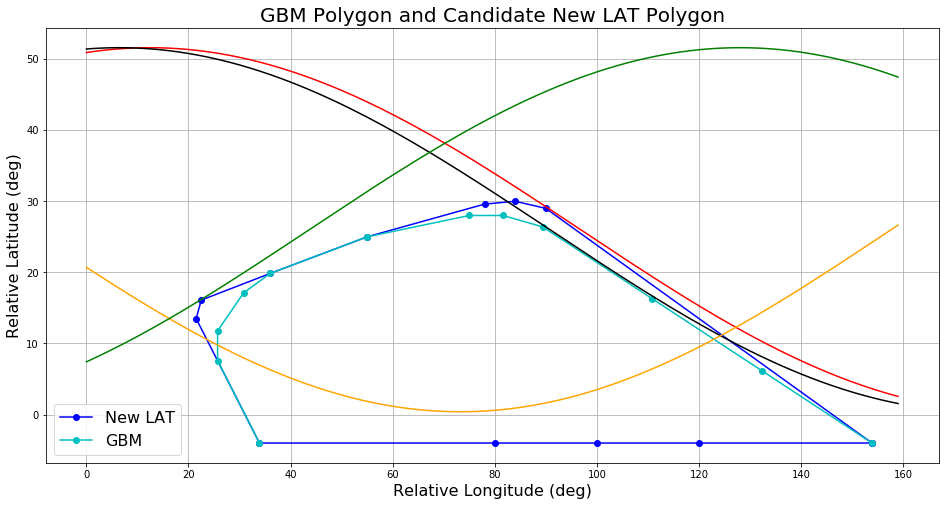

In [37]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(newlon+120,newlat+26,"o-",color='b',label='New LAT')
ax.plot(gbmlon+120,gbmlat+26,"o-",color='c',label='GBM')
plt.title('GBM Polygon and Candidate New LAT Polygon', size=20)
plt.xlabel('Relative Longitude (deg)',size=16)
plt.ylabel('Relative Latitude (deg)',size=16)
plt.legend(fontsize=16)
ax.grid()

phase = 72; ax.plot(orby26[phase:160+phase],color='r')
phase = 78; ax.plot(orby26[phase:160+phase],color='k')
phase = 180; ax.plot(orby26[phase:160+phase],color='orange')
phase = 294; ax.plot(orby26[phase:160+phase],color='g')

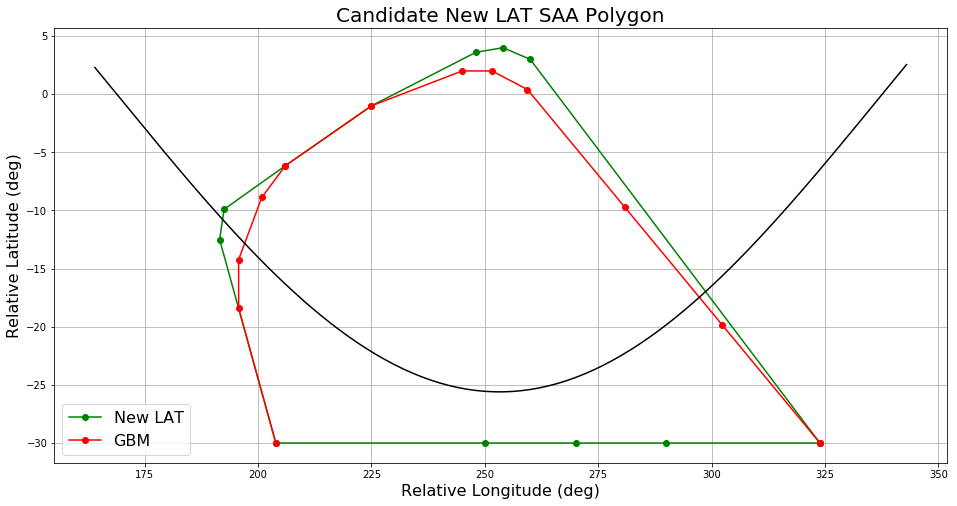

In [38]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(newlon+290,newlat,"o-",color='g',label='New LAT')
ax.plot(gbmlon+290,gbmlat,"o-",color='r',label='GBM')
plt.title('Candidate New LAT SAA Polygon', size=20)
plt.xlabel('Relative Longitude (deg)',size=16)
plt.ylabel('Relative Latitude (deg)',size=16)
plt.legend(fontsize=16)
ax.grid()

phase = 164; ax.plot(orbx[phase:180+phase],orby[phase:180+phase],color='k')
#phase = 143; ax.plot(orby[phase:160+phase])
#phase = 203; ax.plot(orby[phase:160+phase])
#phase = 294; ax.plot(orbx[phase:160+phase],orby[phase:160+phase])

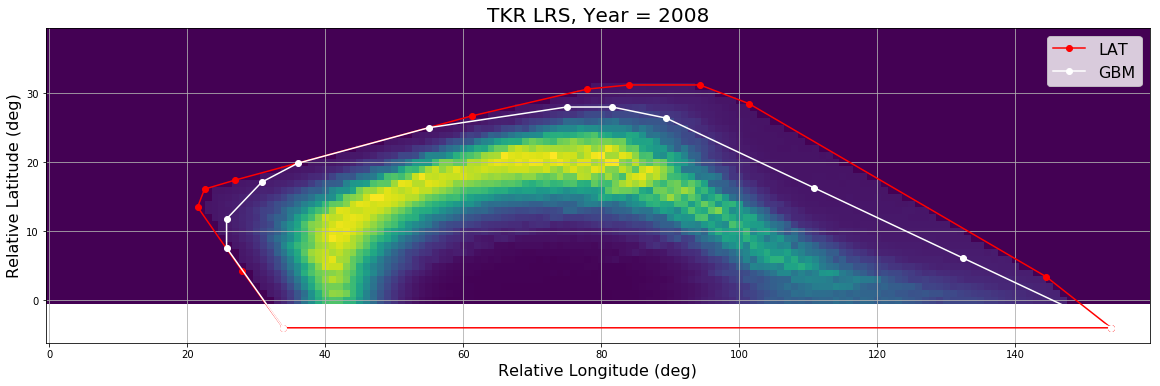

In [39]:
fig, ax = plt.subplots(figsize=(16, 8), constrained_layout=True)
#ax.imshow(np.sqrt(im2),origin='lower')
#ax.imshow(np.log(im2),origin='lower')
ax.imshow(mim08[0:40,60:220],origin='lower')
plt.title(det+' LRS, Year = 2008', size=20)
plt.xlabel('Relative Longitude (deg)',size=16)
plt.ylabel('Relative Latitude (deg)',size=16)
ax.plot(llon+120,llat+26,"o-",color='r',label='LAT')
ax.plot(gbmlon+120,gbmlat+26,"o-",color='w',label='GBM')
plt.legend(fontsize=16)
ax.grid()

def xpix2lon(x):
    return x-180
def lon2xpix(x):
    return x+180
def ypix2lat(y):
    return y-26
def lat2ypix(y):
    return y+26

#secxax = ax.secondary_xaxis('top', functions=(xpix2lon, lon2xpix))
#secyax = ax.secondary_yaxis('right', functions=(ypix2lat, lat2ypix))
#secxax.set_xlabel('Longitude (deg)')
#secyax.set_ylabel('Latitude (deg)')
plt.show()


In [40]:
# look at GEM EBM event rate images

indir='/Users/rac/Documents/GLAST/ISOC/LATmetrics/saa/update-polygon/gemevts/'

gemfile08='revts2008.fits'
gemfile10='revts2010.fits'
gemfile19='revts2019.fits'
gemfile20='revts2020.fits'
gemfile21='revts2021.fits'

gemhdu08 = fits.open(indir+gemfile08)
gemhdu10 = fits.open(indir+gemfile10)
gemhdu19 = fits.open(indir+gemfile19)
gemhdu20 = fits.open(indir+gemfile20)
gemhdu21 = fits.open(indir+gemfile21)

gemimg08 = gemhdu08[0].data
gemimg10 = gemhdu10[0].data
gemimg19 = gemhdu19[0].data
gemimg20 = gemhdu20[0].data
gemimg21 = gemhdu21[0].data

gemim08 = gemimg08[0,:,:]
gemim10 = gemimg10[0,:,:]
gemim19 = gemimg19[0,:,:]
gemim20 = gemimg20[0,:,:]
gemim21 = gemimg21[0,:,:]

np.shape(gemim21)

(53, 361)

/Users/rac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt


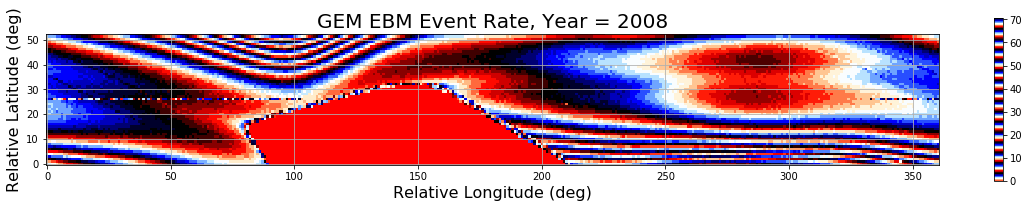

In [41]:
# show GEM EBM event rate image for 2008

fig, ax = plt.subplots(figsize=(20, 3))
im = ax.imshow(np.sqrt(gemim08),origin='lower',cmap='flag',)
fig.colorbar(im, ax=ax)
plt.title('GEM EBM Event Rate, Year = 2008', size=20)
plt.xlabel('Relative Longitude (deg)',size=16)
plt.ylabel('Relative Latitude (deg)',size=16)
ax.grid()

/Users/rac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt


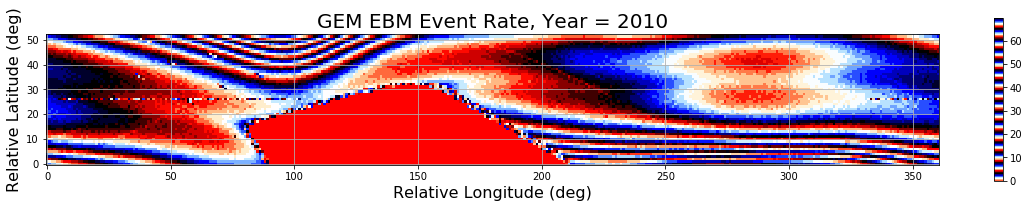

In [42]:
# show GEM EBM event rate image for 2010

fig, ax = plt.subplots(figsize=(20, 3))
im = ax.imshow(np.sqrt(gemim10),origin='lower',cmap='flag',)
fig.colorbar(im, ax=ax)
plt.title('GEM EBM Event Rate, Year = 2010', size=20)
plt.xlabel('Relative Longitude (deg)',size=16)
plt.ylabel('Relative Latitude (deg)',size=16)
ax.grid()

/Users/rac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt


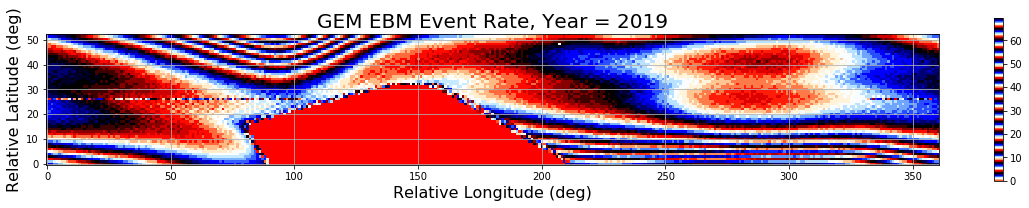

In [43]:
# show GEM EBM event rate image for 2019

fig, ax = plt.subplots(figsize=(20, 3))
im = ax.imshow(np.sqrt(gemim19),origin='lower',cmap='flag',)
fig.colorbar(im, ax=ax)
plt.title('GEM EBM Event Rate, Year = 2019', size=20)
plt.xlabel('Relative Longitude (deg)',size=16)
plt.ylabel('Relative Latitude (deg)',size=16)
ax.grid()

/Users/rac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt


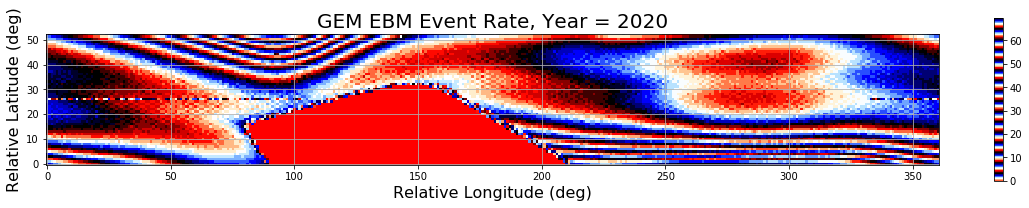

In [44]:
# show GEM EBM event rate image for 2020

fig, ax = plt.subplots(figsize=(20, 3))
im = ax.imshow(np.sqrt(gemim20),origin='lower',cmap='flag',)
fig.colorbar(im, ax=ax)
plt.title('GEM EBM Event Rate, Year = 2020', size=20)
plt.xlabel('Relative Longitude (deg)',size=16)
plt.ylabel('Relative Latitude (deg)',size=16)
ax.grid()

/Users/rac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt


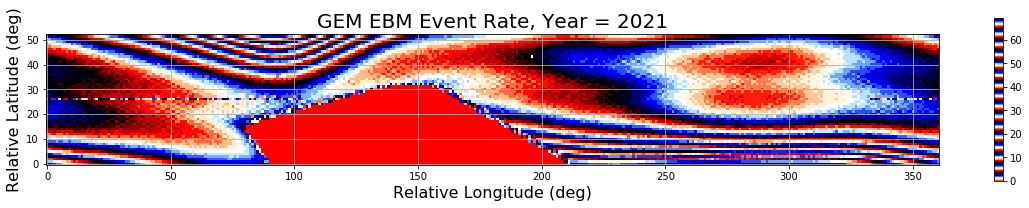

In [45]:
# show GEM EBM event rate image for 2021

fig, ax = plt.subplots(figsize=(20, 3))
im = ax.imshow(np.sqrt(gemim21),origin='lower',cmap='flag',)
fig.colorbar(im, ax=ax)
plt.title('GEM EBM Event Rate, Year = 2021', size=20)
plt.xlabel('Relative Longitude (deg)',size=16)
plt.ylabel('Relative Latitude (deg)',size=16)
ax.grid()

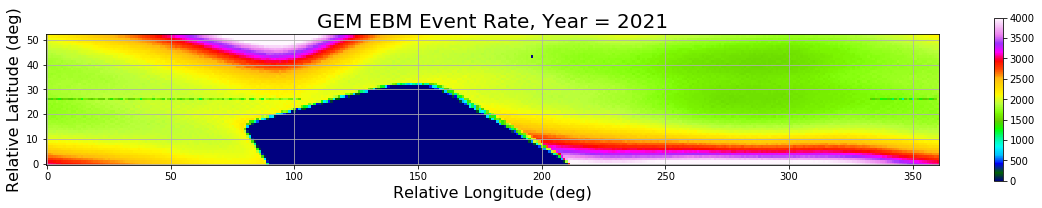

In [46]:
# show GEM EBM event rate image for 2021

fig, ax = plt.subplots(figsize=(20, 3))
im = ax.imshow(gemim21,origin='lower',cmap='gist_ncar',vmin=0,vmax=4e3)
fig.colorbar(im, ax=ax)
plt.title('GEM EBM Event Rate, Year = 2021', size=20)
plt.xlabel('Relative Longitude (deg)',size=16)
plt.ylabel('Relative Latitude (deg)',size=16)
ax.grid()